Ejemplo 1: Arboles de Desición

In [1]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Carga un conjunto de datos (en este caso, el conjunto de datos Iris)
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
# Separa en variable independiente y dependiente
X = iris.data  # Características
y = iris.target  # Etiquetas

In [4]:
# Divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Crea un modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol

DecisionTreeClassifier(random_state=42)

In [6]:
# Entrena el modelo en el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Realiza predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_test)
predicciones

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [8]:
# Calcula la precisión del modelo en el conjunto de prueba
precision = np.mean(predicciones == y_test)
print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}')

# Realiza validación cruzada para obtener una estimación más robusta de la precisión
scores = cross_val_score(modelo_arbol, X, y, cv=5)  # 5-fold cross-validation
print(f'Precisión de validación cruzada: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

Precisión del modelo en el conjunto de prueba: 1.00
Precisión de validación cruzada: 0.95 (+/- 0.07)


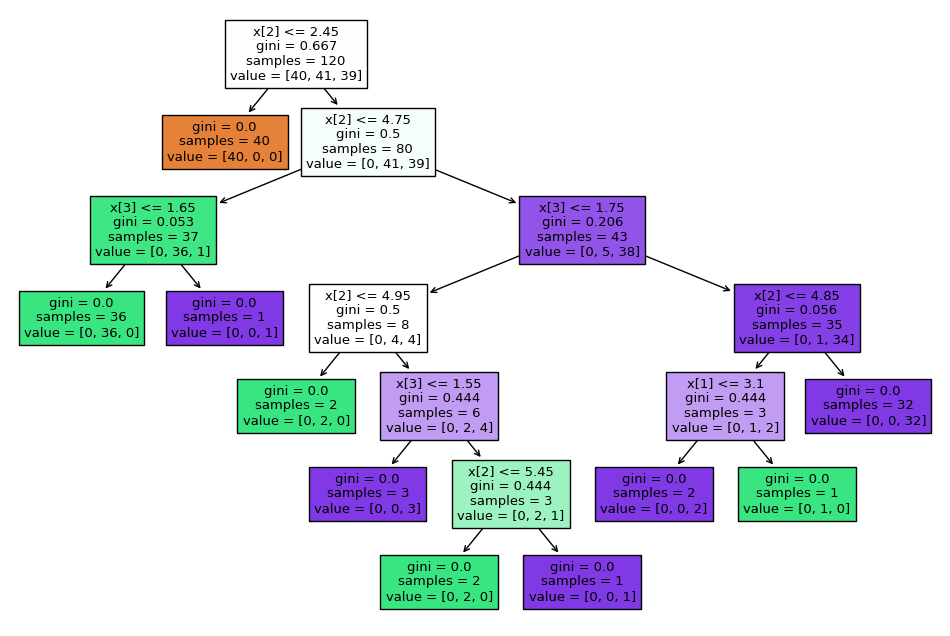

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(modelo_arbol, filled=True)
plt.show()

Ejemplo 2

In [10]:
# Importa las bibliotecas necesarias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import tree

In [11]:
# Carga un conjunto de datos (en este caso, el conjunto de datos Iris)
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [12]:
X = iris.data  # Características
y = iris.target  # Etiquetas

In [13]:
# Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Crea un modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf

RandomForestClassifier(random_state=42)

In [15]:
# Entrena el modelo en el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Realiza predicciones en el conjunto de prueba
predicciones = modelo_rf.predict(X_test)

In [17]:
# Calcula la precisión del modelo en el conjunto de prueba
precision = accuracy_score(y_test, predicciones)
print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}')

# Realiza validación cruzada con 5-fold cross-validation para obtener una estimación más robusta de la precisión
scores = cross_val_score(modelo_rf, X, y, cv=5)
print(f'Precisión de validación cruzada: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

Precisión del modelo en el conjunto de prueba: 1.00
Precisión de validación cruzada: 0.97 (+/- 0.04)


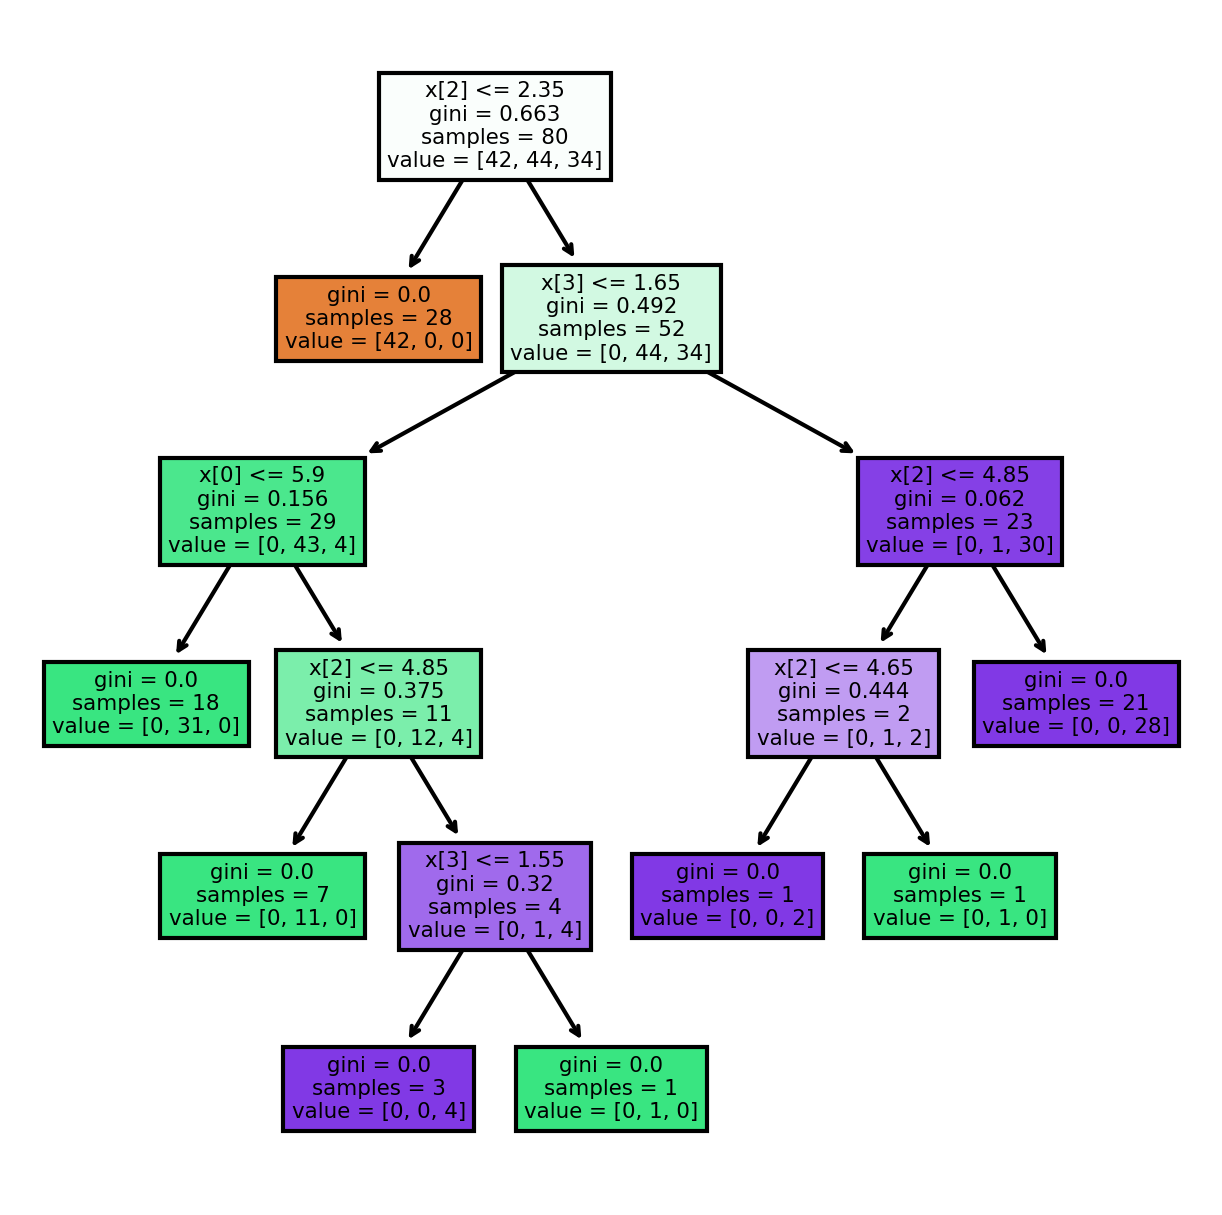

In [24]:
numeroArbol = 99
arbolDelBosque = modelo_rf.estimators_[numeroArbol]

plt.figure(figsize = (5,5), dpi = 300)
tree.plot_tree(arbolDelBosque,filled = True);
plt.show()